#### About

This notebook shows basic analysis tools

#### Todo 
 - Make memory and computation profiling more similar.
 - Use same datastructures is possible
 - Debug

In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
import matplotlib.pyplot as plt

from network_profile import (log_memory, t_profile_net, dataframe_readble, 
                             plt_FLOP_seconds, plt_arithmetic_intensity, 
                             plt_FLOP, plt_time, plt_memory, plt_MAC)
%matplotlib inline
import network_profile
import numpy as np
import pandas as pd
torch.backends.cudnn.benchmark = True


import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

## Init model and data

In [2]:
model = models.resnet18().cuda()
inp = torch.randn(32, 3, 224, 224).cuda()

### Computation profiling

In [3]:
data = t_profile_net(model,inp)
data_sci = dataframe_readble(data)
data_sci.head()

,layer,fw_operation (FLOP),forward_time (s),forward_effi (FLOPs),bw_operation (FLOP),backward_time (s),backward_effi (FLOPs),bw_time/fw_time,input_size,output_size,Mac
0,Conv2d,118.01 M,704.26 µ,167.57 G,236.03 M,745.60 µ,316.56 G,1.058708,"(32, 3, 224, 224)","(32, 64, 112, 112)",30.52 M
1,BatchNorm2d,25.69 M,678.82 µ,37.85 G,25.69 M,697.47 µ,36.83 G,1.027484,"(32, 64, 112, 112)","(32, 64, 112, 112)",51.38 M
2,ReLU,25.69 M,671.42 µ,38.26 G,25.69 M,192.51 µ,133.45 G,0.286721,"(32, 64, 112, 112)","(32, 64, 112, 112)",51.38 M
3,MaxPool2d,25.69 M,686.08 µ,37.44 G,25.69 M,700.39 µ,36.68 G,1.020853,"(32, 64, 112, 112)","(32, 64, 56, 56)",32.11 M
4,Conv2d,115.61 M,667.62 µ,173.16 G,231.21 M,870.72 µ,265.54 G,1.304221,"(32, 64, 56, 56)","(32, 64, 56, 56)",12.88 M


### Plot model efficiency

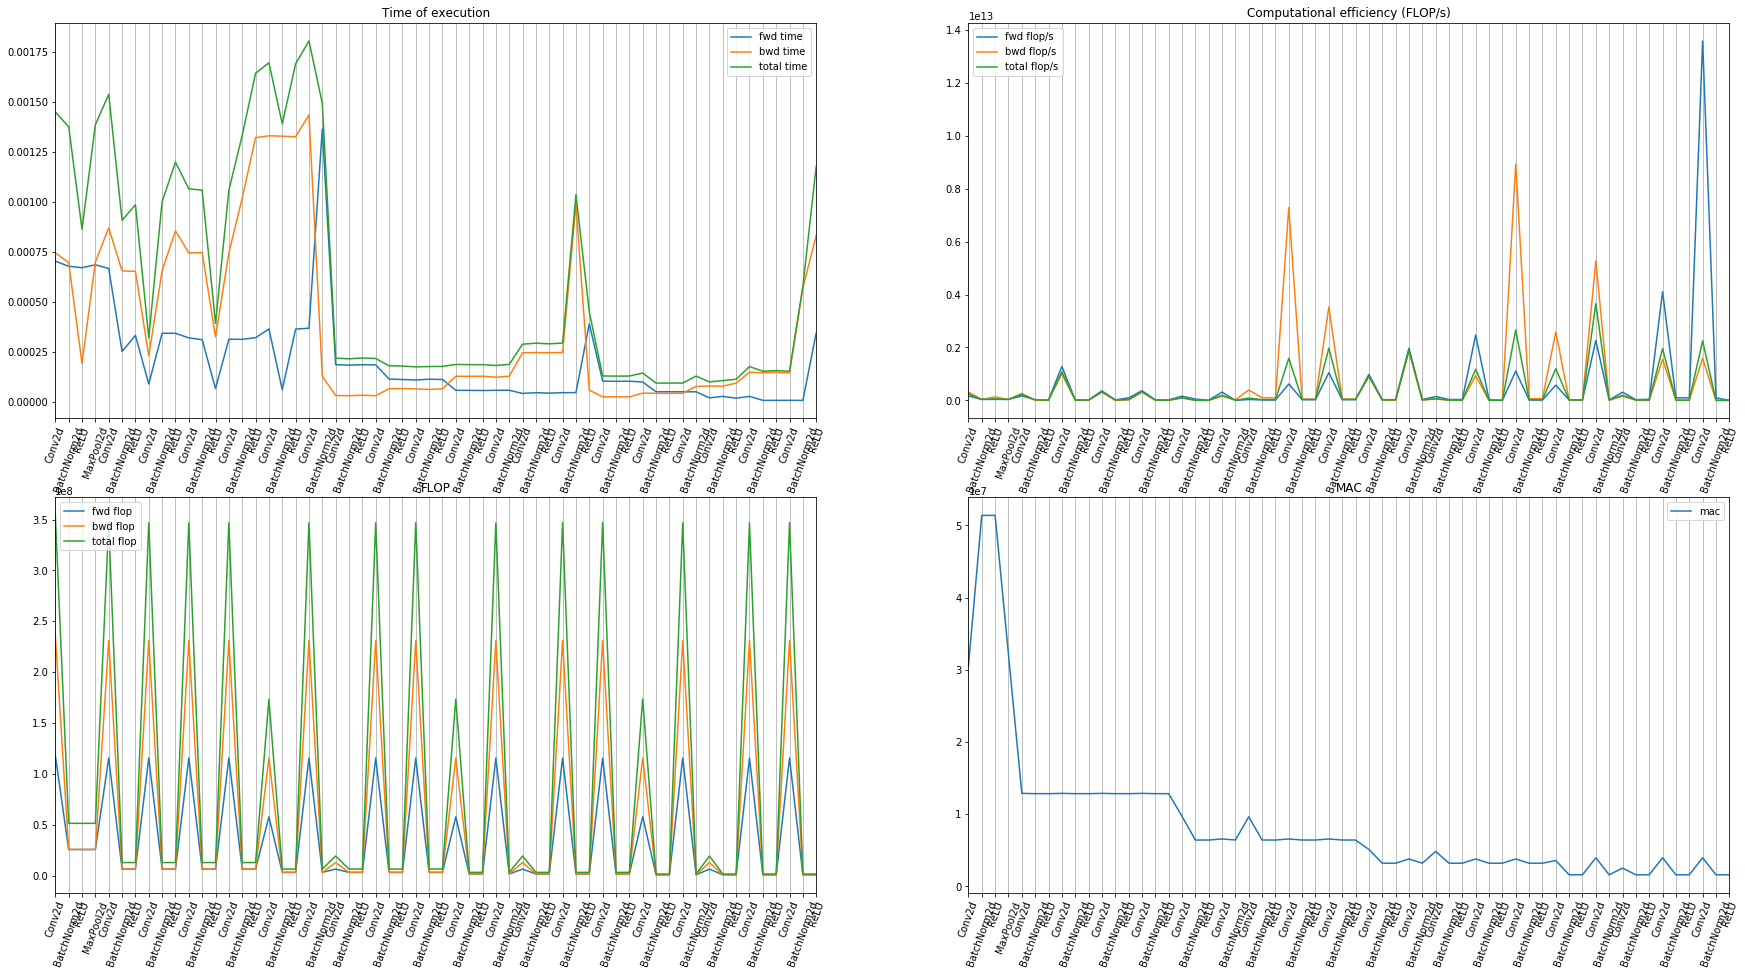

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(30,16))


ax = axes[0,0]
plt_time(data, mode="fwd", normalize=False, ax=ax)
plt_time(data, mode="bwd", normalize=False, ax=ax)
plt_time(data, mode="total", normalize=False, ax=ax)

ax = axes[0,1]
plt_FLOP_seconds(data, "fwd", ax=ax)
plt_FLOP_seconds(data, "bwd", ax=ax)
plt_FLOP_seconds(data, "total", ax=ax)

ax = axes[1,0]
plt_FLOP(data, mode="fwd", normalize=False, ax=ax)
plt_FLOP(data, mode="bwd", normalize=False, ax=ax)
plt_FLOP(data, mode="total", normalize=False, ax=ax)

ax = axes[1,1]
plt_MAC(data, ax)

### Convolutions only

In [5]:
data_conv = data[data.layer=="Conv2d"]

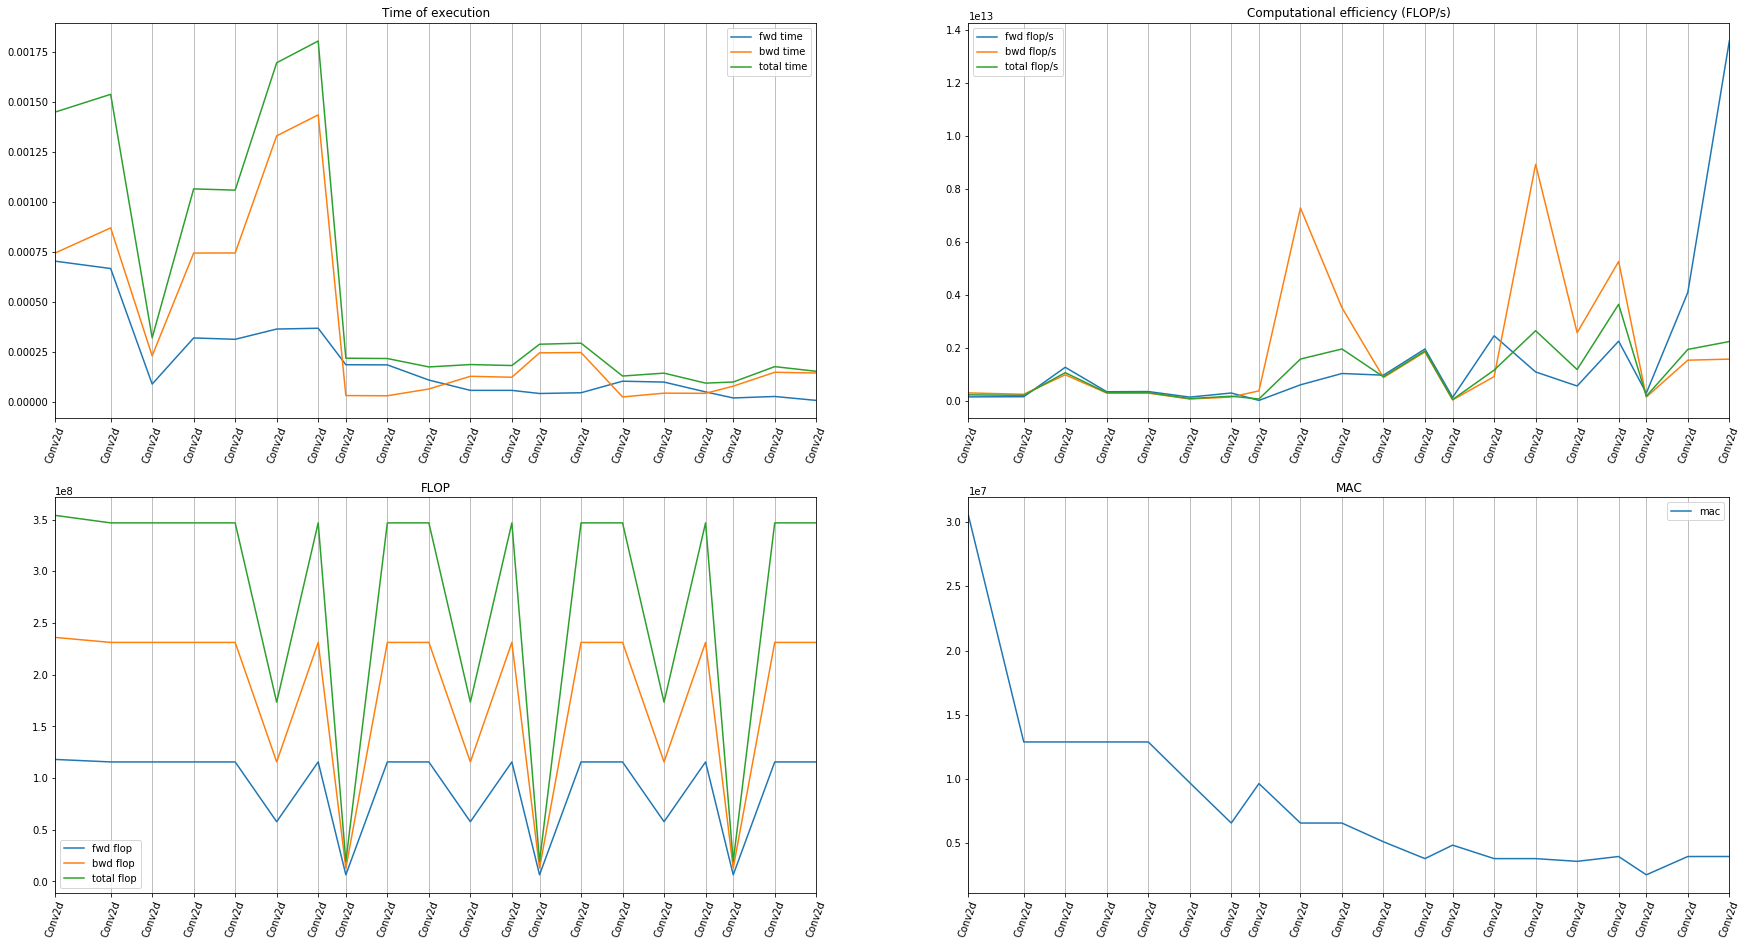

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(30,16))

ax = axes[0,0]
plt_time(data_conv, mode="fwd", normalize=False, ax=ax)
plt_time(data_conv, mode="bwd", normalize=False, ax=ax)
plt_time(data_conv, mode="total", normalize=False, ax=ax)

ax = axes[0,1]
plt_FLOP_seconds(data_conv, "fwd", ax=ax)
plt_FLOP_seconds(data_conv, "bwd", ax=ax)
plt_FLOP_seconds(data_conv, "total", ax=ax)

ax = axes[1,0]
plt_FLOP(data_conv, mode="fwd", normalize=False, ax=ax)
plt_FLOP(data_conv, mode="bwd", normalize=False, ax=ax)
plt_FLOP(data_conv, mode="total", normalize=False, ax=ax)

ax = axes[1,1]
plt_MAC(data_conv, ax)

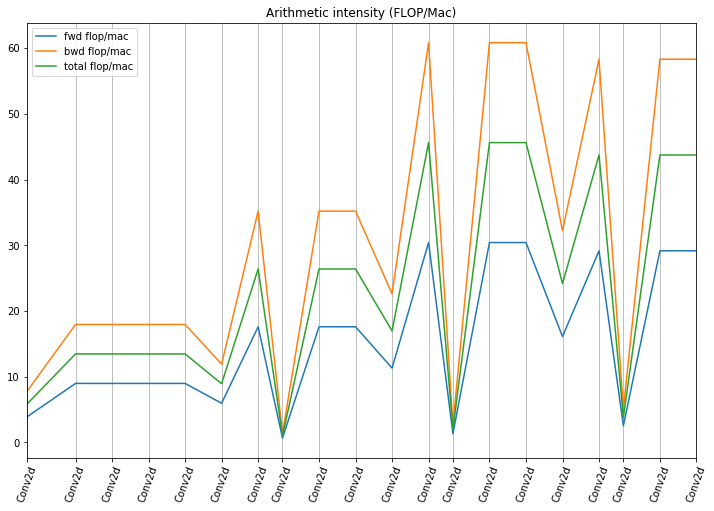

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
plt_arithmetic_intensity(data_conv, mode="fwd", ax=ax)
plt_arithmetic_intensity(data_conv, mode="bwd", ax=ax)
plt_arithmetic_intensity(data_conv, mode="total", ax=ax)

### ==================================

### Memory profiling

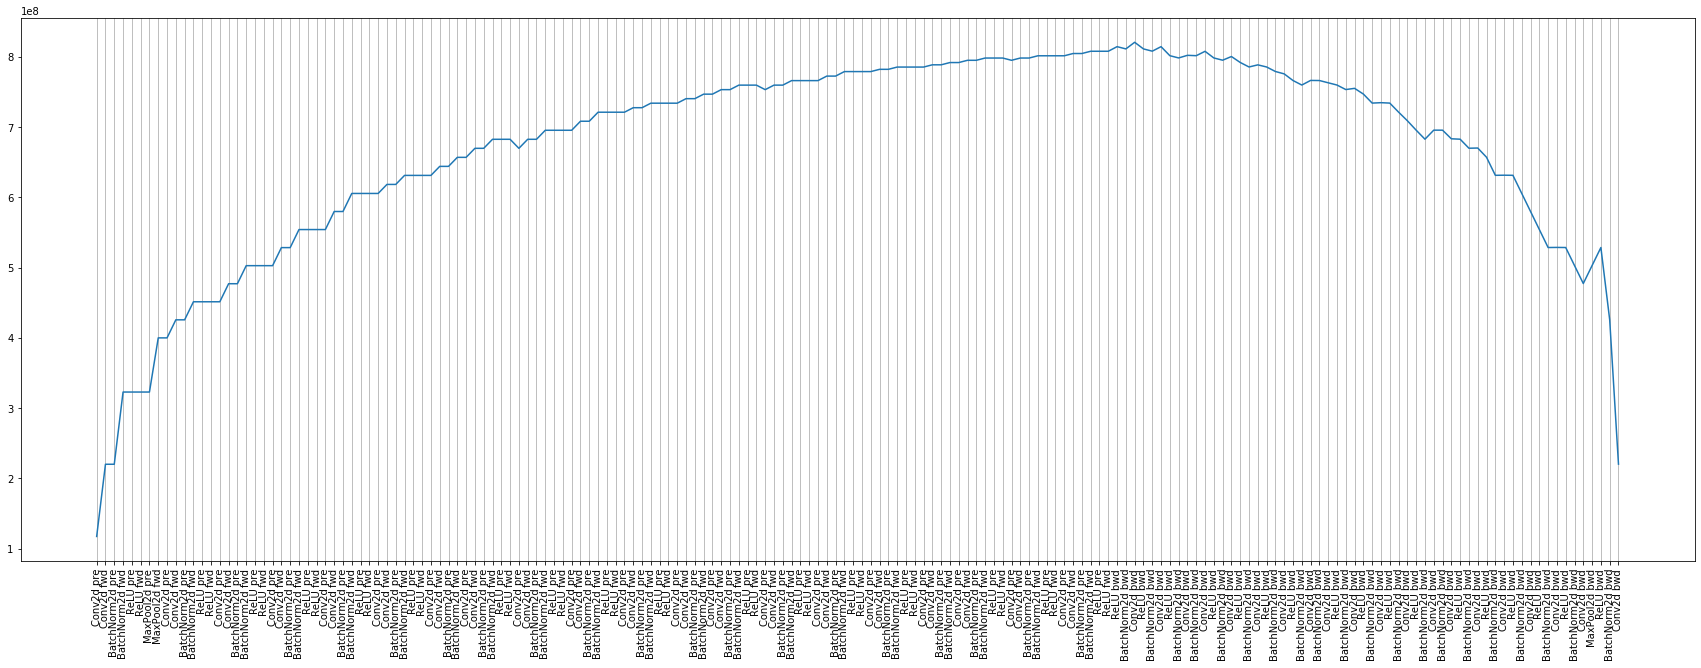

In [8]:
mem = log_memory(model, inp)
plt_memory(mem)